In [2]:
pip install numpy scipy scikit-learn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
%matplotlib inline

In [4]:
import numpy as np #for numerical cal and matrix handling
import matplotlib.pyplot as plt # for plotting 

from sklearn.linear_model import LinearRegression # for linear regression 
from sklearn.model_selection import train_test_split # Divide dat as training
from sklearn.metrics import mean_squared_error # for evaluation

np.random.seed(0) # to control the randopm num generator

## Load dataset ##

In [5]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True)

## Generate your own data ##

In [6]:
def gen_target(X):
    return np.cos(1.5* X)+2

In [7]:
n_records =300
X= np.sort(np.random.rand(n_records)) #Randomly generate data points
y= gen_target(X) +np.random.randn(n_records) * 0.1 #Generate regression

X= X.reshape(-1,1) # COnvert input data as 20
# Generate higher-prder features
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=2)
X=poly_feat.fit_transform(X)

In [8]:
print(y.shape)

(300,)


In [9]:
print('Number of training examples:' , X.shape[0])
print('Number of predictors: ',y.shape[1] if len(y.shape)>1 else 1)

Number of training examples: 300
Number of predictors:  1


Coefficients: 

Intercept :0.0000
Coeff- 0:3.0011
Coeff- 1:-0.1721
Coeff- 2:-0.7934


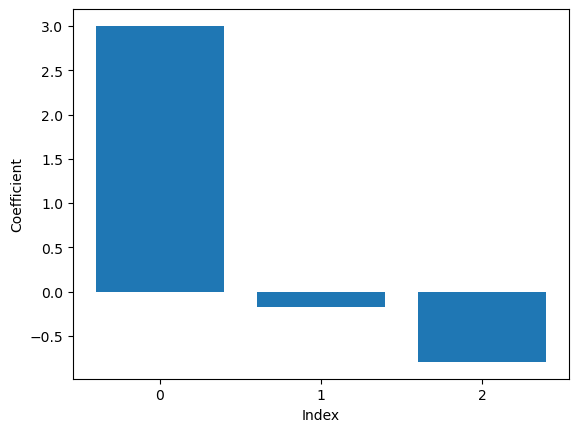


Mean squared error: 0.0116


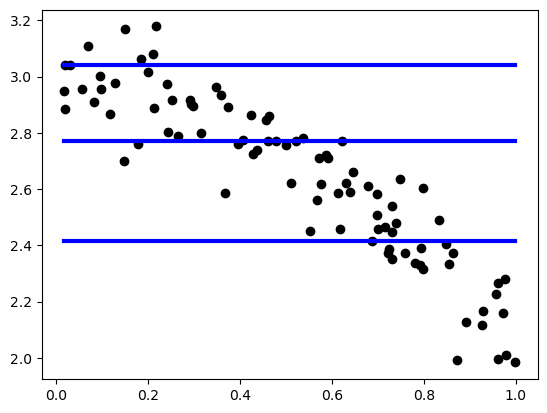

In [17]:
#Split the data into training/testing sets
X_train , X_test , y_train,y_test= train_test_split(X,y,test_size = 0.3,random_state=0)

lr= LinearRegression(fit_intercept=False) #INITIALIZE linear
lr.fit(X_train, y_train) #Train the model using training dta
y_pred = lr.predict(X_test) #Make predictiobns using the testing data

#Display coefficients
print ("Coefficients: \n")
print('Intercept :{0:2.4f}'.format(lr.intercept_))
for ii , coef in enumerate(lr.coef_):
    print('Coeff-{0:2d}:{1:2.4f}'.format(ii, coef))
plt.bar(range(len(lr.coef_)), lr.coef_)
plt.xticks(range(len(lr.coef_)))
plt.xlabel('Index')
plt.ylabel('Coefficient')
plt.show()

print('\nMean squared error: {:2.4f}'.format(mean_squared_error(y_test, y_pred)))


plt.figure()
plt.scatter(X_test[:, 1], y_test, color="black")
plt.plot(np.sort(X_test[:, 1]), y_test[np.argsort(X_test)], color="blue", linewidth=3)

plt.show()
    


Mean squared error: 0.0116


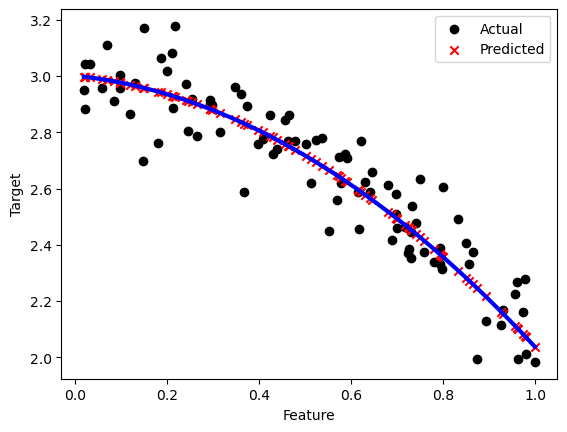

In [16]:
# The mean squared error
print('\nMean squared error: {:2.4f}'.format(mean_squared_error(y_test, y_pred)))
    
# Plot output
plt.figure()
plt.scatter(X_test[:, 1], y_test, color="black", label="Actual")
plt.scatter(X_test[:, 1], y_pred, color="red", label="Predicted", marker='x')
plt.plot(np.sort(X_test[:, 1]), y_pred[np.argsort(X_test[:, 1])], color="blue", linewidth=3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()